In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [44]:
Salary = pd.read_csv ('Salary_Data.csv')
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [45]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<function matplotlib.pyplot.show(close=None, block=None)>

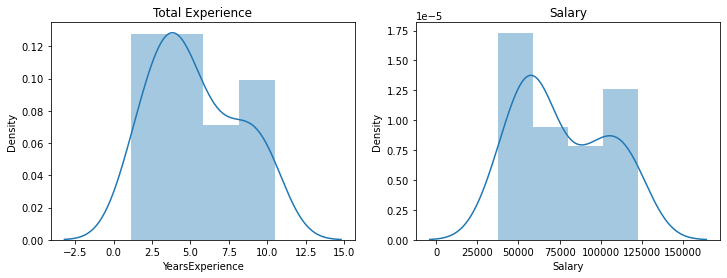

In [46]:
fig,axes = plt.subplots(1, 2, figsize = (12,4))
sns.distplot (Salary['YearsExperience'],ax=axes[0])
axes[0].set_title ('Total Experience')

sns.distplot (Salary['Salary'],ax=axes[1])
axes[1].set_title ('Salary')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

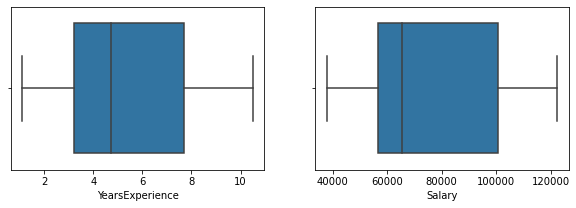

In [47]:
fig,axes = plt.subplots(1,2, figsize = [10,3])
sns.boxplot (Salary['Salary'],ax = axes [1])
sns.boxplot (Salary['YearsExperience'],ax=axes[0])
plt.show

In [100]:
Salary1 = Salary.rename (columns = {'YearsExperience':'YE','Salary':'SL'},inplace = True)

### Fitting Linear model


In [114]:
model = smf.ols("SL~YE",data = Salary).fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        00:25:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Coefficient
print (model.params)

Intercept    25792.200199
YE            9449.962321
dtype: float64


In [117]:
# T-values and P-values
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
YE           24.950094
dtype: float64 
 Intercept    5.511950e-12
YE           1.143068e-20
dtype: float64


In [118]:
# Rsquared values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [120]:
pred = pd.Series ([1,1,2,2,1,5])
predval = pd.DataFrame (pred,columns=["YE"])
model.predict (predval)

0    35242.162520
1    35242.162520
2    44692.124842
3    44692.124842
4    35242.162520
5    73042.011806
dtype: float64